<a href="https://colab.research.google.com/github/iamomtiwari/mini-projects-/blob/iamomtiwari-Projects/MORTALITy_stats%26ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
from scipy.stats import ttest_ind

In [ ]:
#/content/led.csv
import pandas as pd
from scipy.stats import ttest_1samp

# Load the dataset
data = pd.read_csv('/content/led.csv')

# Extract the column that you want to test
sample = data['percentageexpenditure']

# Specify the null hypothesis value
null_mean = 0

# Perform the t-test
t_stat, p_val = ttest_1samp(sample, null_mean)

# Print the results
print('T-Statistic: ', t_stat)
print('P-value: ', p_val)


T-Statistic:  20.129469697443017
P-value:  1.5894032680437329e-84


In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

# Load the dataset/content/HR_comma_sep.csv
df = pd.read_csv('/content/led.csv')

# Split the dataset into two samples
sample1 = df['percentageexpenditure'][df['Status'] == 'Developed']
sample2 = df['percentageexpenditure'][df['Status'] == 'Developing']

# Set the significance level
alpha = 0.05

# Perform two-sample t-test
t_statistic, p_value = ttest_ind(sample1, sample2)

# Print the results
print('t-statistic:', t_statistic)
print('p-value:', p_value)

# Compare the p-value to alpha
if p_value < alpha:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')


t-statistic: 27.629292883512814
p-value: 1.4558637811848918e-149
Reject the null hypothesis


In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load the dataset
df = pd.read_csv('/content/led.csv')

# Create a contingency table
contingency_table = pd.crosstab(df['Alcohol'], df['AdultMortality'])
# Split the dataset into two samples
sample1 = df['percentageexpenditure'][df['Status'] == 'Developed']
sample2 = df['percentageexpenditure'][df['Status'] == 'Developing']

# Set the significance level
alpha = 0.05

# Perform two-sample t-test
t_statistic, p_value = ttest_ind(sample1, sample2)
# Perform chi-square test
chi2_statistic, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print('chi-square statistic:', chi2_statistic)
print('p-value:', p_value)


chi-square statistic: 433990.1501160751
p-value: 1.0


ANOVA


In [ ]:
import pandas as pd
from scipy.stats import f_oneway

# Load the dataset
df = pd.read_csv('/content/led.csv')

# Perform ANOVA
f_statistic, p_value = f_oneway(df['infantdeaths'], df['HIV/AIDS'], df['Measles'])

# Print the results
print('F-statistic:', f_statistic)
print('p-value:', p_value)

F-statistic: 129.0757841496727
p-value: 5.605352909461064e-56


In [ ]:
import numpy as np

class LogisticRegression:
    def __init__(self, alpha=0.05, iterations=1000):
        self.alpha = alpha
        self.iterations = iterations
        
    def fit(self, X, y):
        # Initialize the weights
        self.theta = np.zeros(X.shape[1])
        
        # Run gradient descent
        for i in range(self.iterations):
            z = np.dot(X, self.theta)
            h = self.sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.alpha * gradient
        
    def predict(self, X):
        z = np.dot(X, self.theta)
        h = self.sigmoid(z)
        return (h >= 0.5).astype(int)
        
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame object
df = pd.read_csv('/content/led.csv')

# Print the first few rows of the DataFrame
print(df.head())

       Country  Year      Status  Lifeexpectancy  AdultMortality  \
0  Afghanistan  2015  Developing            65.0           263.0   
1  Afghanistan  2014  Developing            59.9           271.0   
2  Afghanistan  2013  Developing            59.9           268.0   
3  Afghanistan  2012  Developing            59.5           272.0   
4  Afghanistan  2011  Developing            59.2           275.0   

   infantdeaths  Alcohol  percentageexpenditure  HepatitisB  Measles  ...  \
0            62     0.01              71.279624        65.0     1154  ...   
1            64     0.01              73.523582        62.0      492  ...   
2            66     0.01              73.219243        64.0      430  ...   
3            69     0.01              78.184215        67.0     2787  ...   
4            71     0.01               7.097109        68.0     3013  ...   

   Polio  Totalexpenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0    6.0              8.16        65.0       0.1  58

In [ ]:
df.isna().sum()

Country                           0
Year                              0
Status                            0
Lifeexpectancy                   10
AdultMortality                   10
infantdeaths                      0
Alcohol                         194
percentageexpenditure             0
HepatitisB                      553
Measles                           0
BMI                              34
under-fivedeaths                  0
Polio                            19
Totalexpenditure                226
Diphtheria                       19
HIV/AIDS                          0
GDP                             448
Population                      652
thinness1-19years                34
thinness5-9years                 34
Incomecompositionofresources    167
Schooling                       163
dtype: int64

In [ ]:
#Since, only a few rows have null values in them, we are only removing those rows from the dataset.
df = df.dropna(subset=['GDP','BMI','Lifeexpectancy','AdultMortality','Alcohol','HepatitisB','Polio','Totalexpenditure','Diphtheria'])

In [ ]:
total_null_values = df.isnull().sum().sort_values(ascending = False)
percentage = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending = False)
print("Total values present are ",df.shape[0])
total_missing_data = (pd.concat([total_null_values,percentage.round(2)],axis=1,keys=['Total Missing','In precentage']))
total_missing_data

Total values present are  1853


,Total Missing,In precentage
Population,204,11.01
Country,0,0.00
Year,0,0.00
Incomecompositionofresources,0,0.00
thinness5-9years,0,0.00
thinness1-19years,0,0.00
GDP,0,0.00
HIV/AIDS,0,0.00
Diphtheria,0,0.00
Totalexpenditure,0,0.00


In [ ]:
df['Population'].fillna(value = df['Population'].mean(),inplace=True)

In [ ]:
#after removing null values 
total_null_values = df.isnull().sum().sort_values(ascending = False)
percentage = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending = False)
print("Total values present are ",df.shape[0])
total_missing_data = (pd.concat([total_null_values,percentage.round(2)],axis=1,keys=['Total Missing','In precentage']))
total_missing_data

Total values present are  1853


,Total Missing,In precentage
Country,0,0.0
Year,0,0.0
Incomecompositionofresources,0,0.0
thinness5-9years,0,0.0
thinness1-19years,0,0.0
Population,0,0.0
GDP,0,0.0
HIV/AIDS,0,0.0
Diphtheria,0,0.0
Totalexpenditure,0,0.0


In [ ]:
#Checking the unique values present in the target varibale
df['Schooling'].value_counts()

12.9    46
12.5    38
12.8    36
12.3    34
13.3    33
        ..
4.4      1
6.0      1
20.4     1
18.0     1
6.9      1
Name: Schooling, Length: 155, dtype: int64

In [ ]:
correlation = df.corr(numeric_only=True)

In [ ]:
print(correlation['Schooling'])

Year                            0.097410
Lifeexpectancy                  0.706841
AdultMortality                 -0.425145
infantdeaths                   -0.214160
Alcohol                         0.544568
percentageexpenditure           0.404333
HepatitisB                      0.210758
Measles                        -0.119789
BMI                             0.532295
under-fivedeaths               -0.225027
Polio                           0.340756
Totalexpenditure                0.207760
Diphtheria                      0.324457
HIV/AIDS                       -0.214527
GDP                             0.415801
Population                     -0.037213
thinness1-19years              -0.469948
thinness5-9years               -0.454951
Incomecompositionofresources    0.747756
Schooling                       1.000000
Name: Schooling, dtype: float64


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import skew, kurtosis
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, r2_score

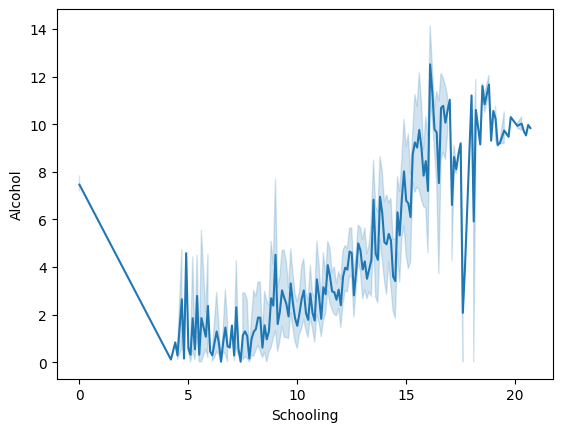

In [ ]:
#Visualising relation between Schooling and Alcohol.
import seaborn as sns
sns.lineplot(x='Schooling',y='Alcohol',data=df)
plt.show()

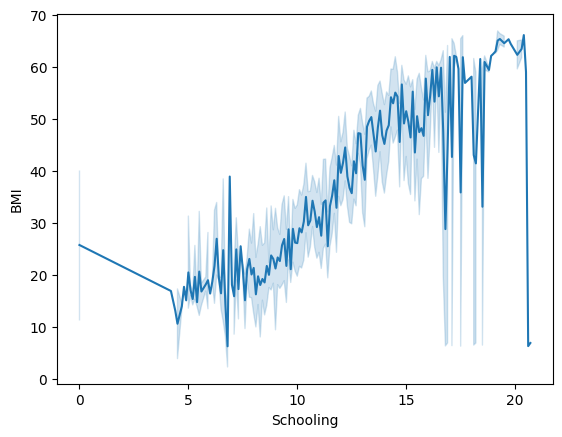

In [ ]:
#Visualising relation between age and ciggarates per day.
sns.lineplot(x='Schooling',y='BMI',data=df)
plt.show()

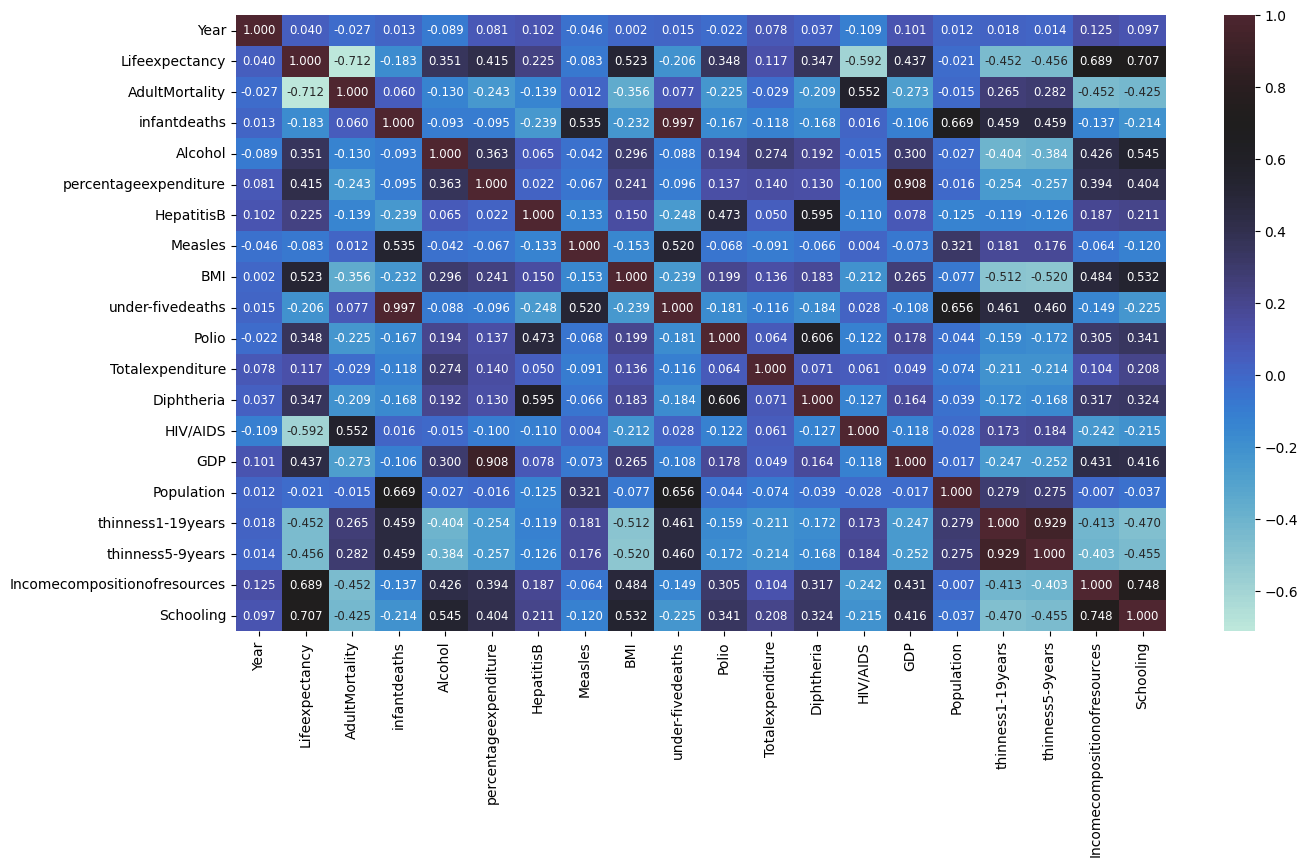

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(correlation,cbar=True,fmt='.3f',annot=True,annot_kws={'size':8.5},center=0.7)
plt.show()

In [ ]:
#rSplitting the dependent and independent variables.
x = df.drop("Schooling",axis=1)
y = df['Schooling']

In [ ]:
x #checking the features

,Country,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,...,under-fivedeaths,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427


In [ ]:
y.shape #checking the output variable

(1853,)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
y_train

1295    15.2
299      8.8
1865    11.5
2561    10.9
1652     8.5
        ... 
1728    10.5
1978     9.9
1357    13.5
2229     9.7
1724    13.0
Name: Schooling, Length: 1482, dtype: float64

In [ ]:
model=LogisticRegression()

In [ ]:
df.drop(columns=['Country'], inplace=True)
df.shape

(1853, 21)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score

""" Load the dataset
Measles                  
Measles                        
BMI
Polio                              
                         
Totalexpenditure              
Diphtheria                      
HIV/AIDS                       
GDP                             
Population """
data = pd.read_csv('/content/led.csv')

selected_columns = ['Measles', 'Polio', 'HIV/AIDS']
data = df[selected_columns]

X = df[selected_columns]

y = df["Status"]


In [ ]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [ ]:
X_train.shape

(1482, 3)

In [ ]:
X_test.shape,y_train.shape,y_test.shape

((371, 3), (1482,), (371,))

In [ ]:
model=LogisticRegression()

In [ ]:
lr = model.fit(X_train,y_train)

In [ ]:
lr.score(X_train,y_train)

0.8461538461538461

In [ ]:
lr_accuracy=lr.score(X_test,y_test)
print(lr_accuracy)

0.8814016172506739


In [ ]:
# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Compute classification metrics
report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

   Developed       0.00      0.00      0.00        44
  Developing       0.88      1.00      0.94       327

    accuracy                           0.88       371
   macro avg       0.44      0.50      0.47       371
weighted avg       0.78      0.88      0.83       371



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Train a logistic regression classifier on the training data
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Predict the labels of the testing data
y_pred = clf.predict(X_test)

# Compute the precision score for the testing data
precision = precision_score(y_test, y_pred, average='micro')
print("Precision:", precision)


Precision: 0.8814016172506739


In [ ]:
from sklearn.metrics import f1_score

# Predict the target values on the test set
y_pred = clf.predict(X_test)

# Compute classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.88
Precision: 0.78
Recall: 0.88
F1 Score: 0.83


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import mode
# Load the HR dataset/content/HR_comma_sep.csv
hr_data = pd.read_csv('/content/led.csv')

# Calculate the mean, median, and mode of the 'Salary' column
Schooling_data = hr_data['Schooling']
Schooling_mean = hr_data['Schooling'].mean()
Schooling_median = hr_data['Schooling'].median()
Schooling_mode = mode(hr_data['Schooling'])

print('Schooling mean:', Schooling_mean)
print('Schooling median:', Schooling_median)
print('Schooling mode:', Schooling_mode)

Schooling mean: 11.992792792792793
Schooling median: 12.3
Schooling mode: ModeResult(mode=array([nan]), count=array([163]))


<ipython-input-68-e90b8fab6241>:11: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  Schooling_mode = mode(hr_data['Schooling'])


In [ ]:
# Visualization of Entropy and Gini index used for Node splitting
# here we implement Entropy and Gini index from scratch
import pandas as pd
import numpy as np

def entropy(p):
    return - p * np.log2(p) - (1 - p) * np.log2(1 - p)


def gini(p):
    return p * (1 - p) + (1 - p) * ( 1 - (1 - p) )


# generate some data
x = np.arange(0, 1., 0.01)
print(x)
# compute entropy and Gini index
ent = [entropy(p) if p != 0 else None for p in x]
gi = gini(x)


[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]


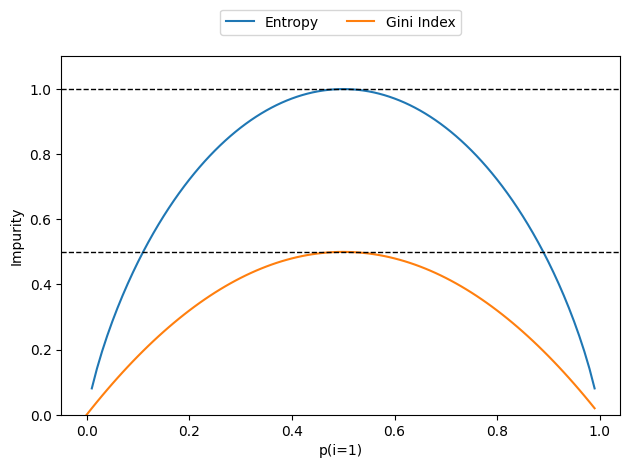

In [ ]:
# plot entropy and gini
import matplotlib.pyplot as plt
plt.plot(x, ent, label = 'Entropy')
plt.plot(x, gi, label = 'Gini Index')
plt.legend(loc = 'upper center', bbox_to_anchor = (0.5, 1.15),
           ncol = 3, fancybox = True, shadow = False)
plt.axhline(y = 0.5, linewidth = 1, color = 'k', linestyle = '--')
plt.axhline(y = 1.0, linewidth = 1, color = 'k', linestyle = '--')
plt.ylim([ 0, 1.1 ])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity')
plt.tight_layout()
plt.show()

<Axes: >

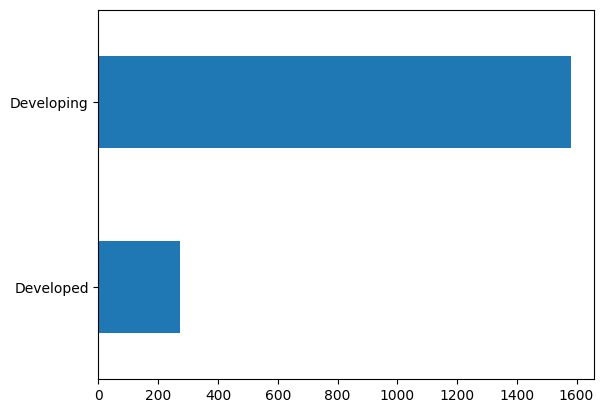

In [ ]:
# check the number of samples in each clases and plot them as bar chart
df['Status'].value_counts().sort_values().plot(kind = 'barh')

In [ ]:
# lets seperate out the feature vectors and the class variables
X=df.drop(columns=['Status'])
Y=df.Status
# to ensure proper split:
df.shape,X.shape,Y.shape

((1853, 21), (1853, 20), (1853,))

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,Y)

In [ ]:
clf.score(X,Y)

1.0

[Text(0.5725446428571429, 0.9545454545454546, 'x[4] <= 8.905\ngini = 0.25\nsamples = 1853\nvalue = [272, 1581]'),
 Text(0.33370535714285715, 0.8636363636363636, 'x[1] <= 81.05\ngini = 0.073\nsamples = 1545\nvalue = [59, 1486]'),
 Text(0.23883928571428573, 0.7727272727272727, 'x[1] <= 78.25\ngini = 0.034\nsamples = 1491\nvalue = [26, 1465]'),
 Text(0.15625, 0.6818181818181818, 'x[4] <= 7.43\ngini = 0.018\nsamples = 1441\nvalue = [13, 1428]'),
 Text(0.08035714285714286, 0.5909090909090909, 'x[14] <= 12.422\ngini = 0.006\nsamples = 1330\nvalue = [4, 1326]'),
 Text(0.03571428571428571, 0.5, 'x[2] <= 149.0\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.017857142857142856, 0.4090909090909091, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.05357142857142857, 0.4090909090909091, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.125, 0.5, 'x[19] <= 15.95\ngini = 0.005\nsamples = 1322\nvalue = [3, 1319]'),
 Text(0.08928571428571429, 0.4090909090909091, 'x[4] <= 6.675\ngini = 0.003\

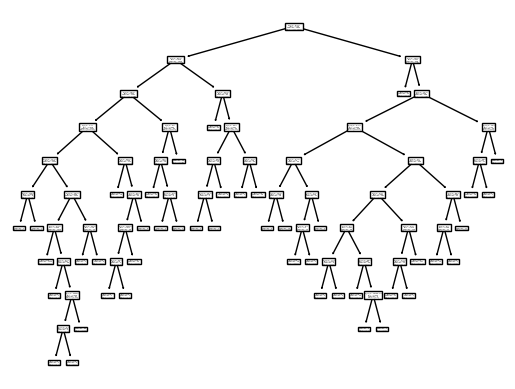

In [ ]:
tree.plot_tree(clf)

In [ ]:
from sklearn.tree import export_text
r = export_text(clf)
print(r)

|--- feature_4 <= 8.90
|   |--- feature_1 <= 81.05
|   |   |--- feature_1 <= 78.25
|   |   |   |--- feature_4 <= 7.43
|   |   |   |   |--- feature_14 <= 12.42
|   |   |   |   |   |--- feature_2 <= 149.00
|   |   |   |   |   |   |--- class: Developed
|   |   |   |   |   |--- feature_2 >  149.00
|   |   |   |   |   |   |--- class: Developing
|   |   |   |   |--- feature_14 >  12.42
|   |   |   |   |   |--- feature_19 <= 15.95
|   |   |   |   |   |   |--- feature_4 <= 6.67
|   |   |   |   |   |   |   |--- class: Developing
|   |   |   |   |   |   |--- feature_4 >  6.67
|   |   |   |   |   |   |   |--- feature_4 <= 6.69
|   |   |   |   |   |   |   |   |--- class: Developed
|   |   |   |   |   |   |   |--- feature_4 >  6.69
|   |   |   |   |   |   |   |   |--- feature_0 <= 2000.50
|   |   |   |   |   |   |   |   |   |--- feature_16 <= 3.10
|   |   |   |   |   |   |   |   |   |   |--- class: Developed
|   |   |   |   |   |   |   |   |   |--- feature_16 >  3.10
|   |   |   |   |   |   |   |  

In [ ]:
"""         'Totalexpenditure', ' AdultMortality','Lifeexpectancy',  'infantdeaths',  'percentageexpenditure',  'BMI',  'under-fivedeaths' , 'Polio',  'Diphtheria' , 'HIV/AIDS','HepatitisB','Measles','GDP',
'Population',                     
'thinness1-19years',        
'Incomecompositionofresources'  
                       """

In [ ]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
y_pred_gini = clf_gini.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9272


In [ ]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array(['Developed', 'Developing', 'Developing', ..., 'Developing',
       'Developing', 'Developing'], dtype=object)

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.9669


In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.9669
Test set score: 0.9272


[Text(0.5416666666666666, 0.875, 'x[4] <= 656.5\ngini = 0.25\nsamples = 1482\nvalue = [217, 1265]'),
 Text(0.3333333333333333, 0.625, 'x[1] <= 279.0\ngini = 0.081\nsamples = 1261\nvalue = [53, 1208]'),
 Text(0.16666666666666666, 0.375, 'x[4] <= 502.5\ngini = 0.017\nsamples = 1169\nvalue = [10, 1159]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.002\nsamples = 1012\nvalue = [1, 1011]'),
 Text(0.25, 0.125, 'gini = 0.108\nsamples = 157\nvalue = [9, 148]'),
 Text(0.5, 0.375, 'x[2] <= 56.5\ngini = 0.498\nsamples = 92\nvalue = [43, 49]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.346\nsamples = 45\nvalue = [35, 10]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.282\nsamples = 47\nvalue = [8, 39]'),
 Text(0.75, 0.625, 'x[1] <= 203.0\ngini = 0.383\nsamples = 221\nvalue = [164, 57]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 26\nvalue = [0, 26]'),
 Text(0.8333333333333334, 0.375, 'x[4] <= 854.5\ngini = 0.267\nsamples = 195\nvalue = [164, 31]'),
 Text(0.75, 0.125, 'gini = 0.174\n

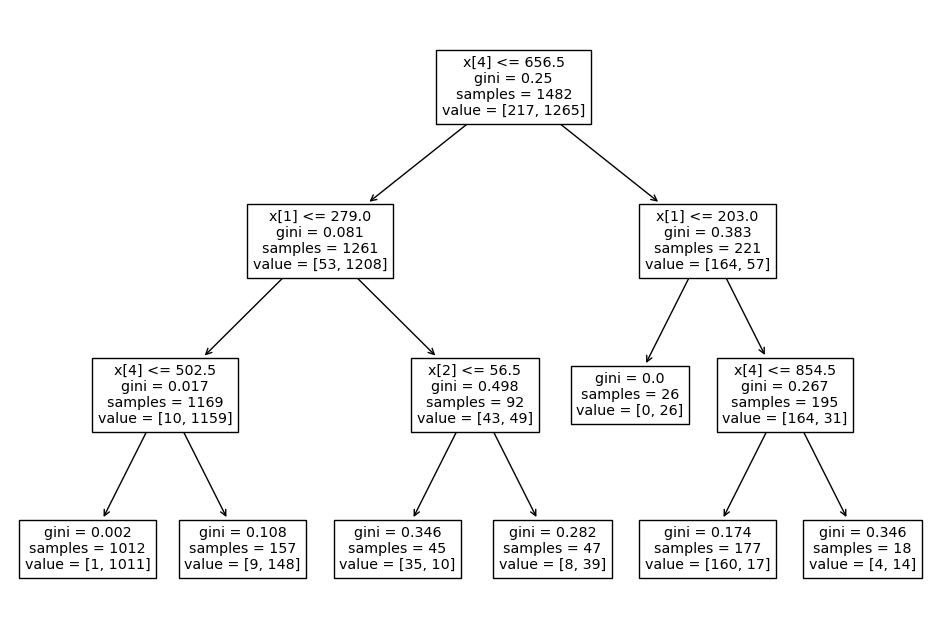

In [ ]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

In [ ]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [ ]:
y_pred_en = clf_en.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.9299


In [ ]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array(['Developed', 'Developing', 'Developing', ..., 'Developing',
       'Developing', 'Developing'], dtype=object)

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.9642


In [ ]:
C# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.9642
Test set score: 0.9299


[Text(0.5416666666666666, 0.875, 'x[4] <= 631.5\nentropy = 0.601\nsamples = 1482\nvalue = [217, 1265]'),
 Text(0.3333333333333333, 0.625, 'x[1] <= 279.0\nentropy = 0.218\nsamples = 1232\nvalue = [43, 1189]'),
 Text(0.16666666666666666, 0.375, 'x[19] <= 92.5\nentropy = 0.06\nsamples = 1149\nvalue = [8, 1141]'),
 Text(0.08333333333333333, 0.125, 'entropy = 0.0\nsamples = 953\nvalue = [0, 953]'),
 Text(0.25, 0.125, 'entropy = 0.246\nsamples = 196\nvalue = [8, 188]'),
 Text(0.5, 0.375, 'x[2] <= 56.5\nentropy = 0.982\nsamples = 83\nvalue = [35, 48]'),
 Text(0.4166666666666667, 0.125, 'entropy = 0.811\nsamples = 40\nvalue = [30, 10]'),
 Text(0.5833333333333334, 0.125, 'entropy = 0.519\nsamples = 43\nvalue = [5, 38]'),
 Text(0.75, 0.625, 'x[1] <= 202.5\nentropy = 0.886\nsamples = 250\nvalue = [174, 76]'),
 Text(0.6666666666666666, 0.375, 'entropy = 0.0\nsamples = 36\nvalue = [0, 36]'),
 Text(0.8333333333333334, 0.375, 'x[4] <= 854.5\nentropy = 0.695\nsamples = 214\nvalue = [174, 40]'),
 Text(

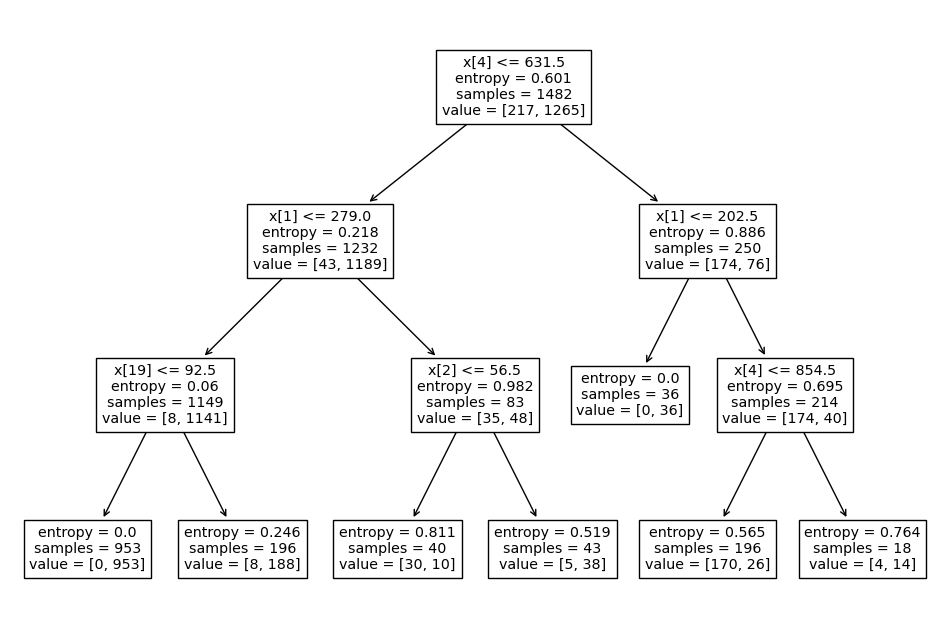

In [ ]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train)) 

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz 

# build the decision tree
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

# export the tree to Graphviz format
dot_data = export_graphviz(tree, out_file=None, feature_names=X.columns, class_names=y.unique(), filled=True, rounded=True, special_characters=True)

# visualize the tree
graph = graphviz.Source(dot_data)
graph.render("my_decision_tree")  # save the tree as PDF or PNG file
graph.view()  # display the tree in a window

'my_decision_tree.pdf'

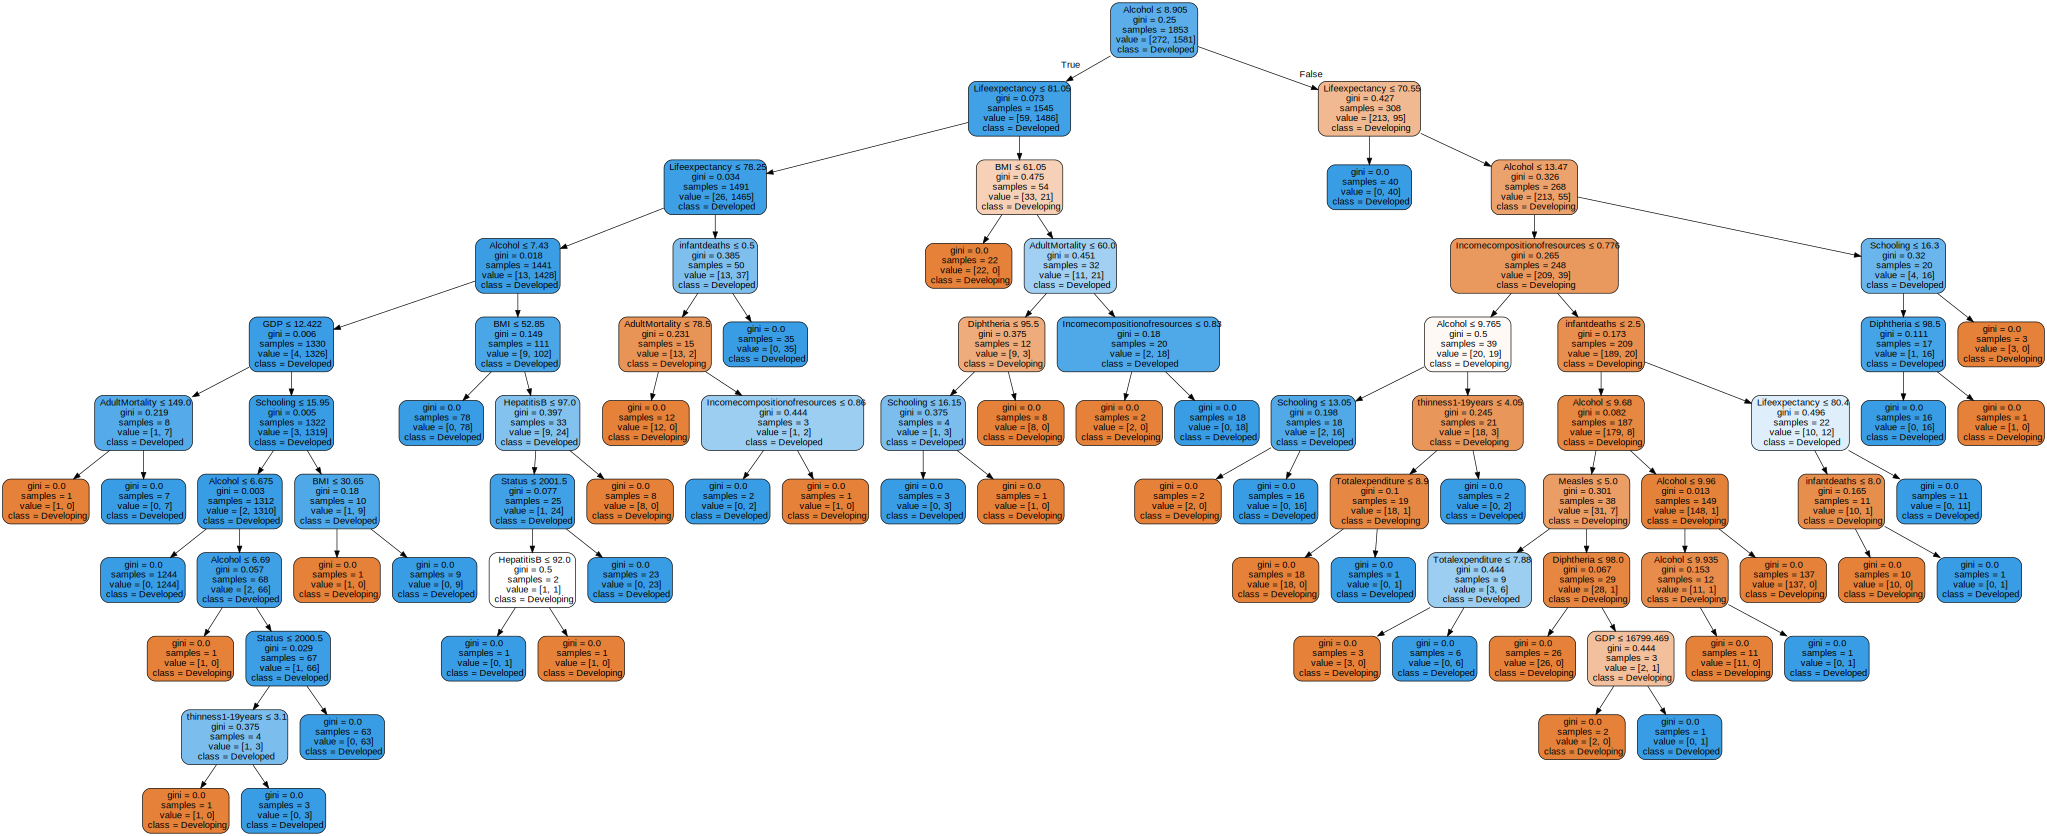

In [ ]:
# A more sophisticated visualization
from sklearn.tree import DecisionTreeClassifier, export_graphviz
dot_data = export_graphviz(clf,
                          feature_names = ['Status','Lifeexpectancy',	'AdultMortality',	'infantdeaths',	'Alcohol'	,'percentageexpenditure',	'HepatitisB',	'Measles',	'BMI',	'under-fivedeaths',	'Polio'	,'Totalexpenditure'	,'Diphtheria',	'HIV/AIDS',	'GDP'	,'Population'	,'thinness1-19years'	,'thinness5-9years'	,'Incomecompositionofresources'	,'Schooling'],
                          class_names = ['Developing', 'Developed'], 
                          filled=True, rounded=True,  
                          special_characters=True)

#Lifeexpectancy	AdultMortality	infantdeaths	Alcohol	percentageexpenditure	HepatitisB	Measles	BMI	under-fivedeaths	Polio	Totalexpenditure	Diphtheria	HIV/AIDS	GDP	Population	thinness1-19years	thinness5-9years	Incomecompositionofresources	Schooling
graph = graphviz.Source(dot_data) 
graph

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

   Developed       0.71      0.89      0.79        55
  Developing       0.98      0.94      0.96       316

    accuracy                           0.93       371
   macro avg       0.85      0.91      0.87       371
weighted avg       0.94      0.93      0.93       371



LINEAR REGRESSION 

In [ ]:
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import io

In [ ]:
df=df.dropna(axis=0)

In [ ]:
df.isnull().sum()

Year                            0
Status                          0
Lifeexpectancy                  0
AdultMortality                  0
infantdeaths                    0
Alcohol                         0
percentageexpenditure           0
HepatitisB                      0
Measles                         0
BMI                             0
under-fivedeaths                0
Polio                           0
Totalexpenditure                0
Diphtheria                      0
HIV/AIDS                        0
GDP                             0
Population                      0
thinness1-19years               0
thinness5-9years                0
Incomecompositionofresources    0
Schooling                       0
dtype: int64

In [ ]:
X.head()

,Year,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
